# Binary segmentation using MRF

In [12]:
import os
import skimage
import maxflow
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append(os.path.join('..', '..'))
import toolbox
from imp import reload
reload(toolbox)

<module 'toolbox' from '/Users/williammarstrand/privat/DTU/Kandidat/1. Semester/Advanced Image Analysis/02506-advanced-image-analysis/exercises/week5/../../toolbox/__init__.py'>

## Part 1 DTU Logo

In [16]:
im = skimage.io.imread(os.path.join('data', 'DTU_noisy.png')).astype(float)/255

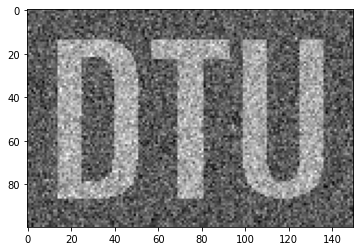

In [17]:
plt.imshow(im, cmap='gray')

### Looking at pixel intensities

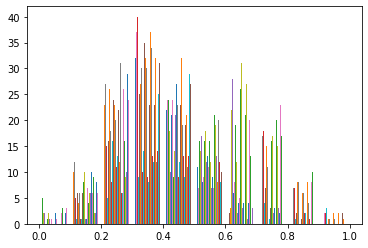

In [18]:
plt.hist(im)
plt.show()

We can quite easily make a cut off e.g. at 100 to make a binary segmentation

In [35]:
segmentation = im > 0.55
segmentation

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

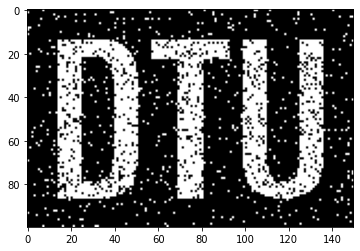

In [36]:
plt.imshow(segmentation, cmap='gray')

In [37]:
# MRF parameters
beta  = 0.1
mu = [90/255, 170/255]

In [38]:
# Setting up graph with internal and external edges
g = maxflow.Graph[float]()
nodeids = g.add_grid_nodes(im.shape)
g.add_grid_edges(nodeids, beta)
g.add_grid_tedges(nodeids, (im-mu[1])**2, (im-mu[0])**2)

In [39]:
g.maxflow()
S = g.get_grid_segments(nodeids)

Text(0.5, 1.0, 'Segmentation histogram')

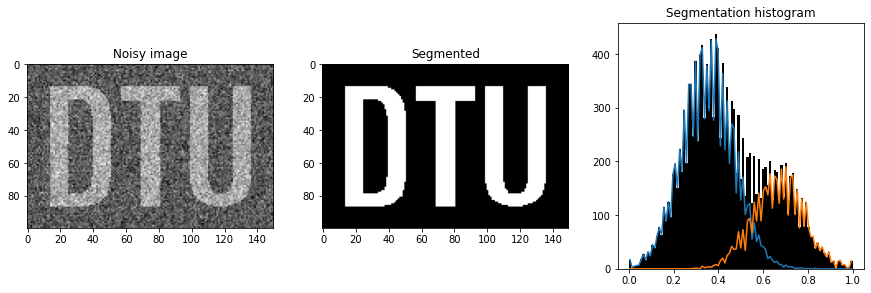

In [44]:
# Visualization
fig, ax = plt.subplots(1, 3, figsize=(15,10))
ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].set_title('Noisy image')
ax[1].imshow(S, plt.cm.gray)
ax[1].set_title('Segmented')
toolbox.segmentation.segmentation_histogram(ax[2], im, S, edges=None)
ax[2].set_aspect(1./ax[2].get_data_ratio())
ax[2].set_title('Segmentation histogram')

## Part 2 - Bones

In [2]:
bone_im = skimage.io.imread(os.path.join('data', 'V12_10X_x502.png')).astype(float)/(2**16-1)

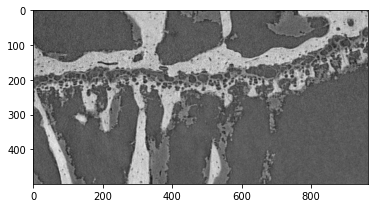

In [4]:
plt.imshow(bone_im, cmap='gray')

Inspecting image histogram to choose mean intensities for bone and air

Text(0.5, 1.0, 'intensity histogram')

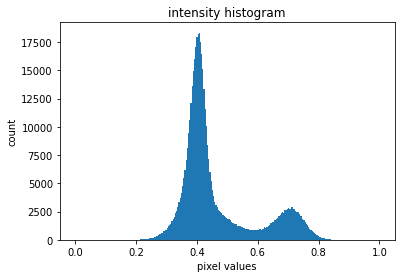

In [6]:
edges = np.linspace(0, 1, 257)
fig, ax = plt.subplots()
ax.hist(bone_im.ravel(), edges)
ax.set_xlabel('pixel values')
ax.set_ylabel('count')
ax.set_title('intensity histogram')

In [10]:
beta = 0.1
mu = [0.4, 0.7]
# Setting up graph with internal and external edges
g = maxflow.Graph[float]()
nodeids = g.add_grid_nodes(bone_im.shape)
g.add_grid_edges(nodeids, beta)
g.add_grid_tedges(nodeids, (bone_im-mu[1])**2, (bone_im-mu[0])**2)
g.maxflow()
S = g.get_grid_segments(nodeids)

Text(0.5, 1.0, 'Segmentation histogram')

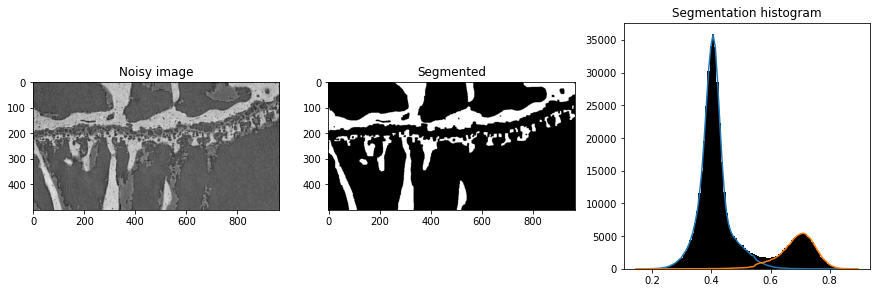

In [11]:
# Visualization
fig, ax = plt.subplots(1, 3, figsize=(15,10))
ax[0].imshow(bone_im, cmap=plt.cm.gray)
ax[0].set_title('Noisy image')
ax[1].imshow(S, plt.cm.gray)
ax[1].set_title('Segmented')
toolbox.segmentation.segmentation_histogram(ax[2], bone_im, S, edges=None)
ax[2].set_aspect(1./ax[2].get_data_ratio())
ax[2].set_title('Segmentation histogram')